In [2]:
from typing import TypedDict, Dict
from langgraph.graph import StateGraph, START, END

In [5]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalnumber: int

In [17]:
def adder(state: AgentState) -> AgentState:
     """This node adds the 2 numbers"""

     state["finalnumber"] = state['number1'] + state["number2"]
     return state

def subtractor(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state["finalnumber"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state: AgentState)-> AgentState:
    """This node will select the next node of the graph"""

    if state["operation"]== "+":
        return "addition_operation"
    
    elif state["operation"] == "-":
      return "subtraction_operation"

In [18]:
graph = StateGraph(AgentState)

#NODES
graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state) #passthrough function

#EDGE
graph.add_edge(START, "router")

#CONDITIONAL EDGES
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge: Node
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app=graph.compile()

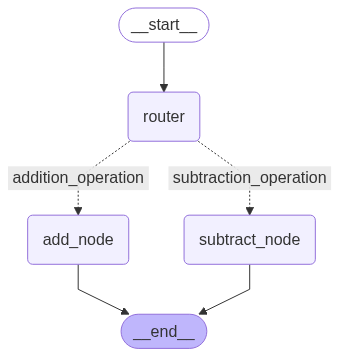

In [19]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
state1 = AgentState(number1=10, number2=2, operation="-")

app.invoke(state1)

{'number1': 10, 'operation': '-', 'number2': 2, 'finalnumber': 8}

In [23]:
initial_state_1 = {'number1': 10, 'operation': '-', 'number2': 2}
app.invoke(initial_state_1)

{'number1': 10, 'operation': '-', 'number2': 2, 'finalnumber': 8}

# Exercise:

In [24]:
from typing import TypedDict, Dict
from langgraph.graph import StateGraph, START, END

In [28]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1 : str
    operation2: str
    result1: int
    result2: int


In [31]:
def adder1 (state: AgentState) -> AgentState:
    state["result1"] = state["number1"] + state["number2"]
    return state

def adder2 (state: AgentState) -> AgentState:
    state["result1"] = state["number3"] + state["number4"]
    return state

def sub1 (state: AgentState) -> AgentState:
    state["result2"] = state["number1"] - state["number2"]
    return state

def sub2 (state: AgentState) -> AgentState:
    state["result2"] = state["number3"] - state["number4"]
    return state

def decide_next_node1(state:AgentState):
    if state["operation1"] == "+":
        return "add_edge1"
    else:
        return "sub_edge1"
    
def decide_next_node2(state: AgentState):
    if state["operation2"] == "+":
        return "add_edge2"
    else:
        return "sub_edge2"

In [35]:
graph= StateGraph(AgentState)

graph.add_node("router1", lambda state: state)
graph.add_node("router2", lambda state: state)
graph.add_node("adder1_node", adder1)
graph.add_node("adder2_node", adder2)
graph.add_node("sub1_node", sub1)
graph.add_node("sub2_node", sub2)

graph.add_conditional_edges(
    "router1",
    decide_next_node1,
    
    {
     "add_edge1": "adder1_node",
     "sub_edge1": "sub1_node"
     }
    )

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "add_edge2": "adder2_node",
        "sub_edge2": "sub2_node"
    }
)

graph.add_edge(START, "router1")
graph.add_edge("adder1_node", "router2")
graph.add_edge("sub1_node", "router2")

graph.add_edge("adder2_node", END)
graph.add_edge("sub2_node", END)


app=graph.compile()

In [36]:
state = {
    'number1': 5,
    'number2': 2,
    'number3': 8,
    'number4': 4,
    'operation1' : "+",
    'operation2': "-"
}

In [37]:
app.invoke(state)

{'number1': 5,
 'number2': 2,
 'number3': 8,
 'number4': 4,
 'operation1': '+',
 'operation2': '-',
 'result1': 7,
 'result2': 4}

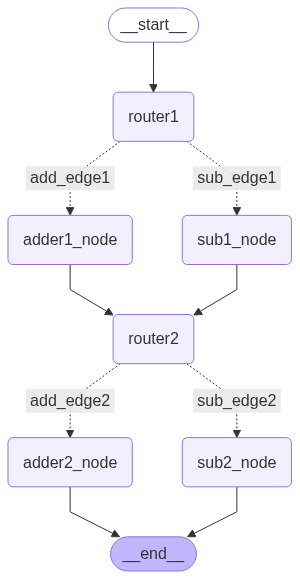

In [38]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))